<table>
<tr>
<td width=15%><img src="https://www.nitrkl.ac.in/assets/images/logo.png"></img></td>
<td><center><h1>National Institute of Technology
Rourkela, Odisha, India, 769008</h1><h2>Department of Computer Science Engineering</h2></center></td>
</tr>
<tr><td colspan=2><center><h3>SUMMER INTERNSHIP cum TRAINNING PROGRAMME</h3></br>
            <b>(Theme: Artificial Intelligence and Data Science)</b></center></td></tr>
</table>

# Problem Understanding

1. Here the objective is to predict whether a patient will survive or not after 5 years from treatment based on the patient's      age,year of treatment,number of posotive auxuliary node.

2. Our Task is to perform an EDA(Exploratory Data Analysis).

3. It is a prediction classification problem.

4. The dataset we are going to deal with is haberman.csv


# Data Understanding

1.The dataset contains cases from a study that was conducted at the University of Chicago’s Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

2.Let's import the data to gain some of the basic information about it .

source-https://archive.ics.uci.edu/ml/datasets/Haberman's+Survival

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels import robust
import warnings
warnings.filterwarnings("ignore")

In [2]:
hab=pd.read_csv('haberman.csv')

In [3]:
hab.shape

(306, 4)

1. From the shape function it is clearly visible that the data contains 306 rows and 4 columns.

2. now lets view the dataset to get some more information about the variables.

In [4]:
hab.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Attribute Information

1. From the above dataframe it is clearly visible the dataset contains 4 variables.
               i. "age" -> represents Age of the patient.(data type= integer)
               ii. "year" -> patient's year of operation. (data type=integer)
               iii. "nodes" -> number of positive auxuillary nodes.(data type=integer)
               iv.  "status" -> Survival status (class attribute) 
                                1 = the patient survived 5 years or longer 
                                2 = the patient died within 5 year


source-https://archive.ics.uci.edu/ml/datasets/Haberman's+Survival               

In [5]:
hab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


1. From the above "info" function it is clearly visible that all the 4 variables of out dataset are integer type.
2. Our dataset also contains no missing value also.
3. Our target variable is "status" column.


Let's check our target variable to see whether it is balanced or not.

In [6]:
hab['status'].value_counts()

status
1    225
2     81
Name: count, dtype: int64

1. It seems like 73% of the people has survied as 225 is 73% of 306 cases.
2. The ratio between survived and not survived is 73:27 
3. Result- balanced.

# Calculation of Central Tendency

 Now let's calculate the central tendency of each variables of our dataset.

In [7]:
print("MEAN:")

print("Mean of age {}" .format(np.mean(hab['age'])))
print("Mean of year {} ".format(np.mean(hab['year'])))
print("Mean of nodes {}".format(np.mean(hab['nodes'])))

print("\n")
print("MEDIAN:")

print("Median of age {}".format(np.median(hab['age'])))
print("Median of year {}".format(np.median(hab['year'])))
print("Median of nodes {}".format(np.median(hab['nodes'])))

print("\n")
print("STANDARD DEVIATION:")

print("Standard Deviation of age {}".format(np.std(hab['age'])))
print("Standard Deviation of year {}".format(np.std(hab['year'])))
print("Standard Deviation of nodes {}".format(np.std(hab['nodes'])))



MEAN:
Mean of age 52.45751633986928
Mean of year 62.85294117647059 
Mean of nodes 4.026143790849673


MEDIAN:
Median of age 52.0
Median of year 63.0
Median of nodes 1.0


STANDARD DEVIATION:
Standard Deviation of age 10.78578520363183
Standard Deviation of year 3.244090833563246
Standard Deviation of nodes 7.177896092811152


From above observations,
1. node variable has got the minimum mean from age and year variable.
2. node variable has got the minimum median from age and year variable.
3. year variable has got greater standard-deviation from its mean. It may contains outlier.

# Percentile,Quantile,IQR,MAD

In [8]:
print("Quantile:")
print("Quantile of age {}".format(np.percentile(hab['age'],np.arange(0,100,25))))
print("Quantile of year {}".format(np.percentile(hab['year'],np.arange(0,100,25))))
print("Quantile of nodes {}".format(np.percentile(hab['nodes'],np.arange(0,100,25))))

print("\n")
print("90thPercentile:")
print("percentile of age {}".format(np.percentile(hab['age'],90)))
print("percentile of year {}".format(np.percentile(hab['year'],90)))
print("percentile of nodes {}".format(np.percentile(hab['nodes'],90)))

print("\n")
print("MAD:")

print("MAD of age{}".format(robust.mad(hab['age'])))
print("MAD of year {}".format(robust.mad(hab['year'])))
print("MAD of nodes {}".format(robust.mad(hab['nodes'])))

Quantile:
Quantile of age [30.   44.   52.   60.75]
Quantile of year [58.   60.   63.   65.75]
Quantile of nodes [0. 0. 1. 4.]


90thPercentile:
percentile of age 67.0
percentile of year 67.0
percentile of nodes 13.0


MAD:
MAD of age11.860817748044816
MAD of year 4.447806655516806
MAD of nodes 1.482602218505602


# Graphical Exploration

## 2-D scatter plot

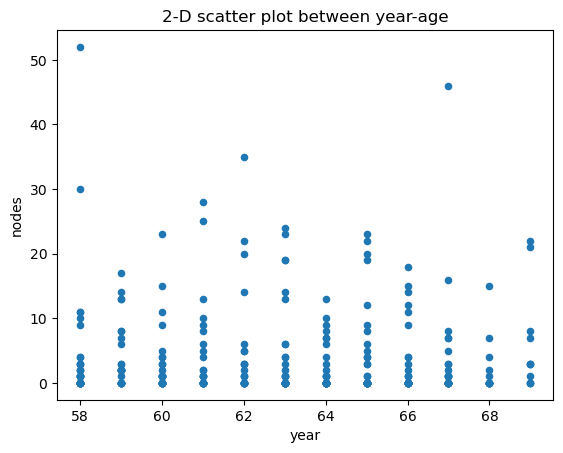

In [9]:
hab.plot(kind='scatter',x='year',y='nodes')
plt.title("2-D scatter plot between year-age")
plt.show()

From the above observation,

1.It is clearly visible that by taking year and node variable it is not separable.


Text(0.5, 1.0, '2-D scatter plot between age-nodes')

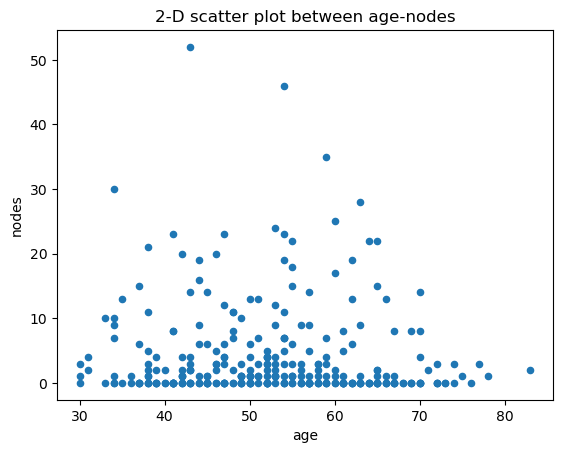

In [10]:
hab.plot(kind='scatter',x='age',y='nodes')
plt.title("2-D scatter plot between age-nodes")

From the above observation,

1. By taking the age and node variable it is not clearly separable.
2. It is not making much sense.

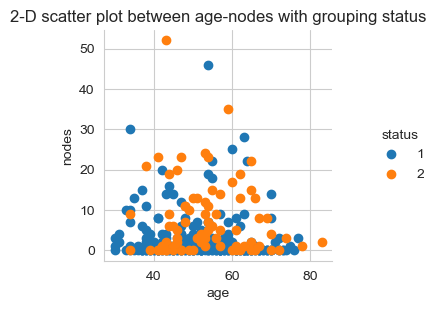

In [12]:
sns.set_style("whitegrid");
sns.FacetGrid(hab, hue="status") \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();

plt.title("2-D scatter plot between age-nodes with grouping status")
plt.show();

1. as you can see from the graph we can't separate between the survival status from the above graph.
2. lets plot other variable to draw some interpretation.

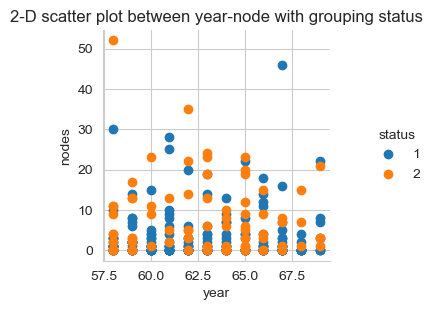

In [13]:
sns.set_style("whitegrid");
sns.FacetGrid(hab, hue='status') \
   .map(plt.scatter ,'year','nodes')   \
   .add_legend()

plt.title("2-D scatter plot between year-node with grouping status")
plt.show()


1. From years and nodes variable also it is not making much sense.
2. It is difficult to separate from this two variables plot.

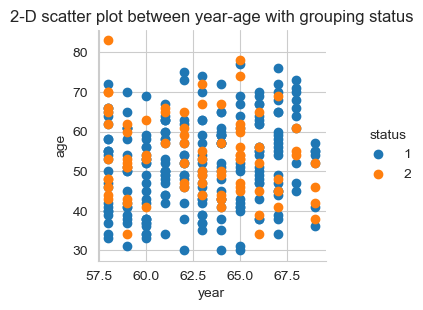

In [14]:
sns.set_style("whitegrid");
sns.FacetGrid(hab, hue='status') \
   .map(plt.scatter ,'year','age')   \
   .add_legend()

plt.title("2-D scatter plot between year-age with grouping status")
plt.show()


1. This one looking more difficult from above two graphs.
2. we can't go for these two variables.

Let's plot a pair plot to look at all the combination graph between the variables.

# PAIR PLOT

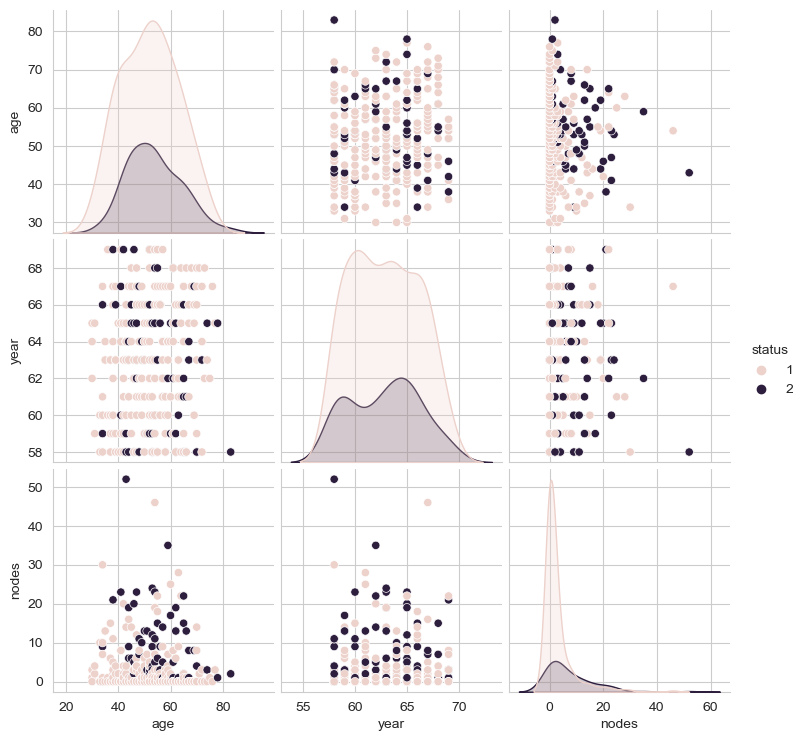

In [15]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(hab,vars=["age","year","nodes"],hue="status");
plt.show()

From the above pairplot,
1. Age is seems to be normally distributed.
2. It is difficult to tell which variable is good to classify the target from this pairplot.

Lets plot the Histogram to see the PDF and CDF.

# Histogram,PDF,CDF 

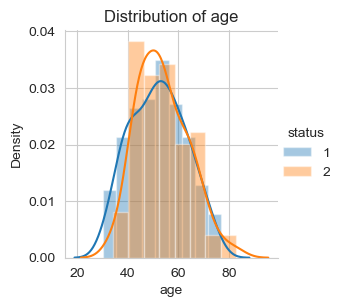

In [16]:
sns.set_style("whitegrid")
sns.FacetGrid(hab, hue="status") \
   .map(sns.distplot,'age')  \
   .add_legend()

plt.title("Distribution of age")
plt.show()

1. Age seems to be normally distributed.
2. separation can't be done by considering the age variable as they are overlapping.

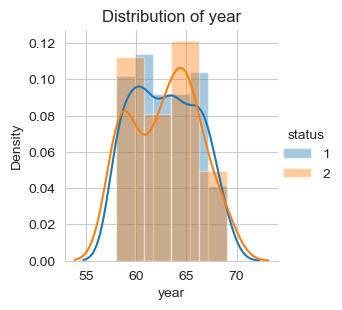

In [17]:
sns.set_style('whitegrid')
sns.FacetGrid(hab, hue='status')  \
   .map(sns.distplot,'year')  \
   .add_legend()
    
plt.title("Distribution of year")
plt.show()

1. year is not normally distributed and as the status 1 & 2 are overlapping it is not making much sense to consider "year"        variable for separation.  

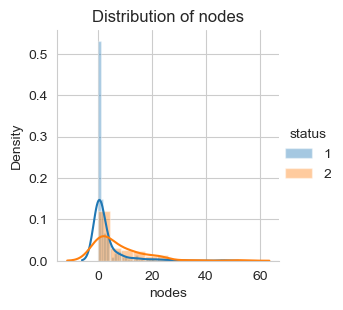

In [18]:
sns.set_style('whitegrid')
sns.FacetGrid(hab, hue='status')  \
   .map(sns.distplot,'nodes')  \
   .add_legend()
    
plt.title("Distribution of nodes")
plt.show()

1. It seems like the variable is positively skewed.(mean<median<mode)
2. Those who have nodes between 0-5 survived,which is clearl visible from the blue histogram.
3. we can't separate status by taking nodes variable.

[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


Text(0, 0.5, 'probability')

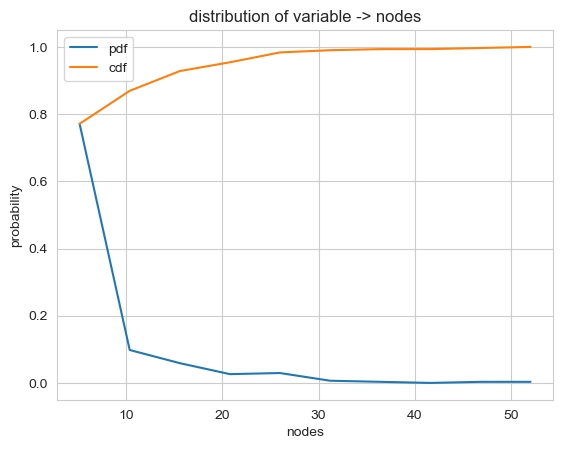

In [19]:
counts, bin_edges = np.histogram(hab['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf');
plt.plot(bin_edges[1:], cdf,label='cdf');
plt.legend()
plt.title("distribution of variable -> nodes")
plt.xlabel("nodes")
plt.ylabel("probability")


[0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


Text(0, 0.5, 'probability')

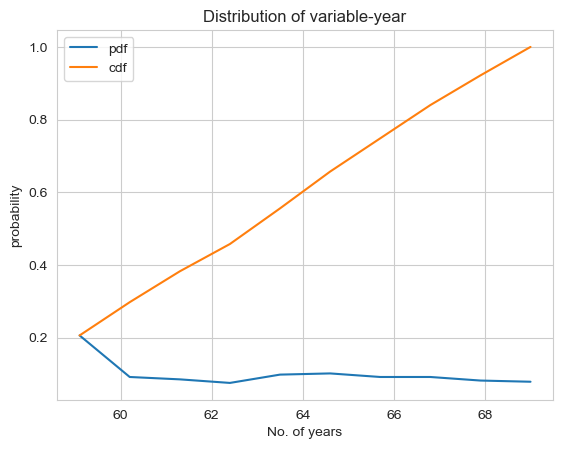

In [20]:
counts, bin_edges = np.histogram(hab['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf,label='pdf');
plt.plot(bin_edges[1:],cdf,label='cdf');
plt.legend()

plt.title("Distribution of variable-year")
plt.xlabel("No. of years")
plt.ylabel("probability")



[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


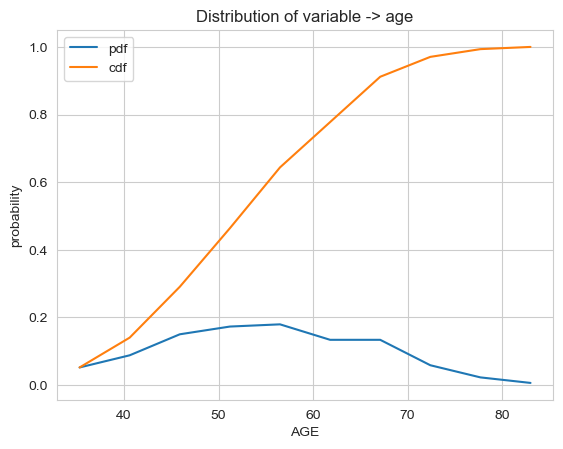

In [21]:
counts, bin_edges = np.histogram(hab['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf');
plt.plot(bin_edges[1:], cdf,label='cdf');

plt.legend()
plt.title("Distribution of variable -> age")
plt.xlabel("AGE")
plt.ylabel("probability")
plt.show()


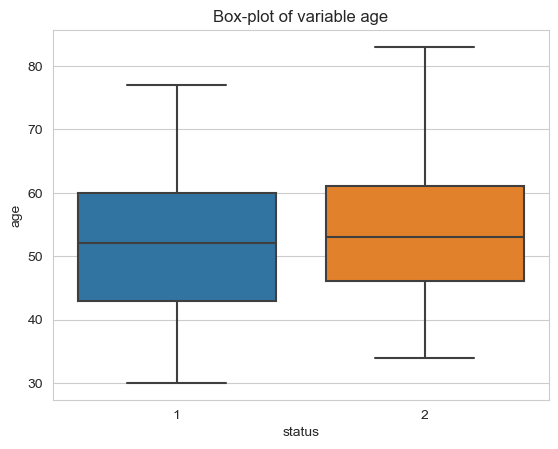

In [22]:
sns.boxplot(x='status',y='age', data=hab)
plt.title("Box-plot of variable age")
plt.show()

1. The blue Box-Plot(i.e.Status=1) has got a median age of 53.

2. The orange Box-plot(i.e.Status=2) has got a sightly more median age.The 25th and 75th percentile value of the orange box        plot is more than the blue one.

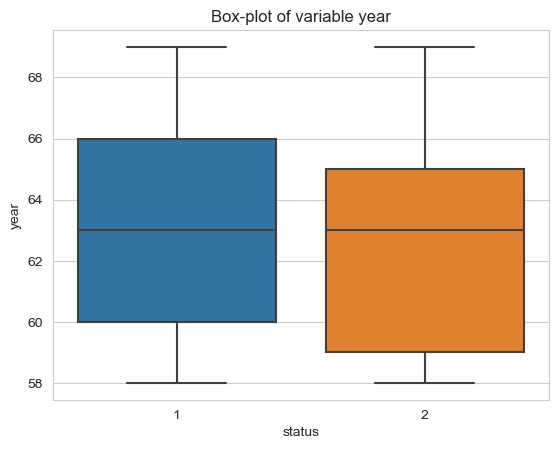

In [23]:
sns.boxplot(x='status',y='year',data=hab)
plt.title("Box-plot of variable year")
plt.show()

1. The Blue box-plot (i.e. Status=1) has got an median around 63.
2. The Orange box-plot (i.e. status=2) has got approximately same median as blue box-plot,but differ in 25th and 75th              percentile values.

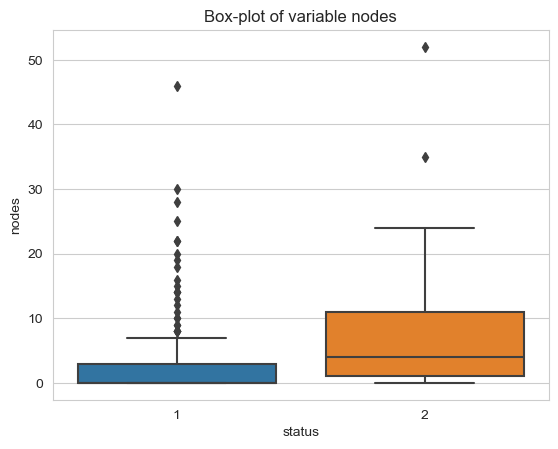

In [24]:
sns.boxplot(x='status',y='nodes',data=hab)
plt.title("Box-plot of variable nodes")
plt.show()

1. In the blue box-plot(i.e.Status=1) have got an nodes value between 0-8(approximately). It is consists of outliers.

2. In the orange box-plot(i.e.Status=2) have got an nodes value between 1-11(approximately). It consists of less number of outliers than those who have status=1.

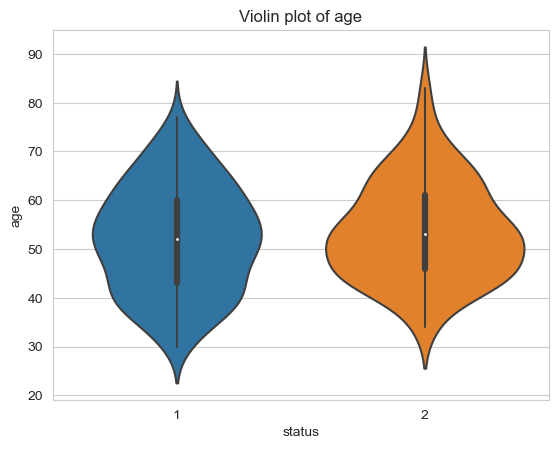

In [25]:
sns.violinplot(x='status',y='age',data=hab,size=8)
plt.title("Violin plot of age")
plt.show()

1. Data Seems to be normally distributed in both the cases.

2. Median age in (status=1) is around 53.

3. Median age in (status=2) is around 54.

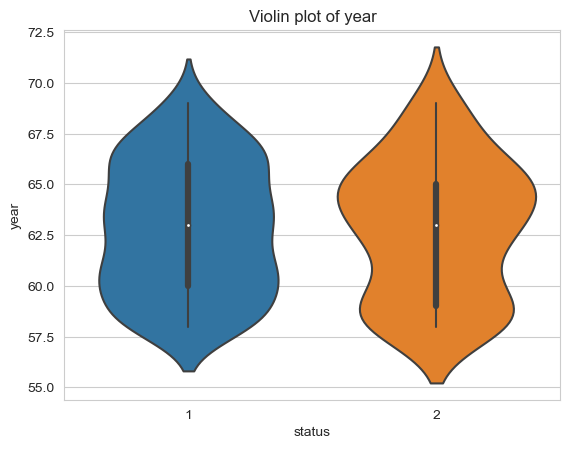

In [26]:
sns.violinplot(x='status',y='year',data=hab,size=8)
plt.title("Violin plot of year")
plt.show()

1. The median year of operation  is around 1963.

2. year variable seems to be normally distributed.

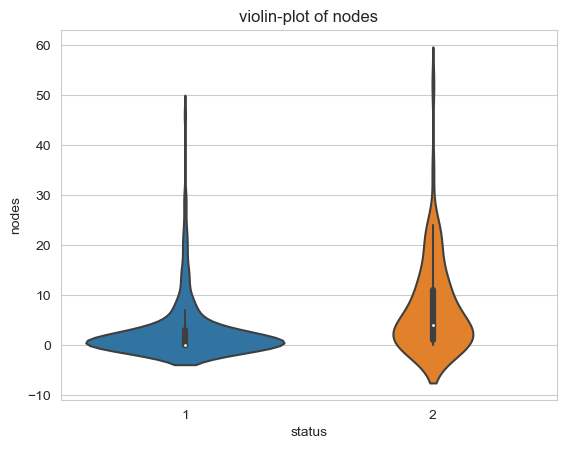

In [27]:
sns.violinplot(x='status',y='nodes',data=hab,size=8)
plt.title("violin-plot of nodes")
plt.show()

1. In the blue violin plot (i.e. status=1) has got an median near to 0.
2. The blue violin plot is positively skewed.
3. The orange violin plot (i.e. status=2) has got a median near to 5.


1. Most of the patient's age is between 40-60.

2. Most of the operation is performed between 1958-1968.

# CONCLUSION

1. The volume of the dataset is (306,4).(i.e. it contains 306 rows and 4 columns)
2. We confirm that our dataset is fairly balanced.
3. We first calculate the central tendency of each independent variable and reach to a conclusion that the variable nodes          contains outliers.

4. From the various scatter plot and pairplot we confirmed that it is diffult to separate the status(i.e. target variable)          linearly.

5. From the distribution plot also it is clear that the graphs of the three variables(i.e. age,year,nodes) are overlaping.

6. By ploting the pdf,cdf, we check that the age is following a normal distribution.

7. From box-whiskers plot we found outliers in the nodes variable.

8. From violin-plot we check the distribution and range of every variables.

9. From joint-plot we plot and check the most of the treatment years and age of patients.

